<h2>Importing Dependencies</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<h2>Loading DataSet</h2>

In [2]:
insurance_dataset = pd.read_csv('insurance.csv')
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
insurance_dataset.shape

(1338, 7)

<h2>Data Analysis and Visualizaiton</h2>

In [4]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


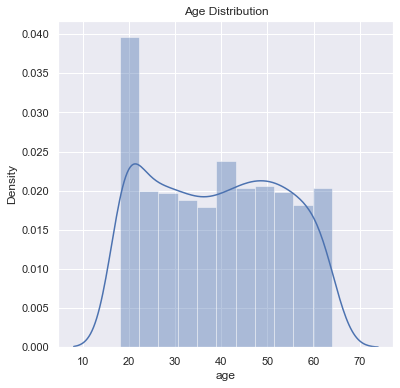

In [7]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

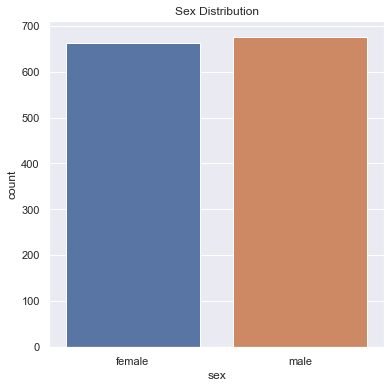

In [8]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


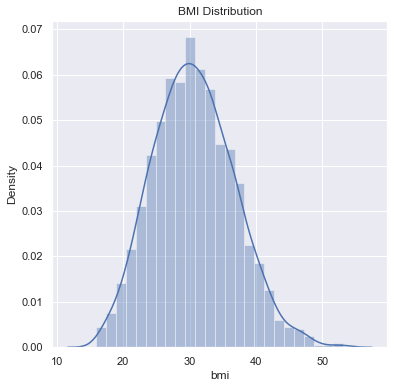

In [9]:
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

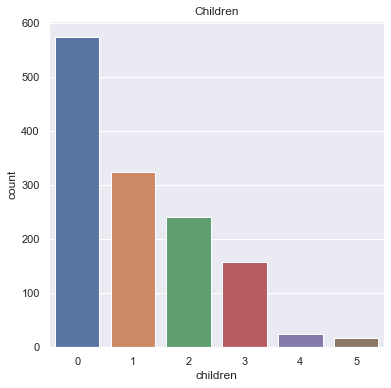

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

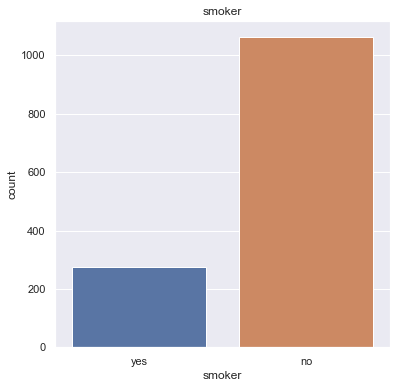

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

<AxesSubplot:>

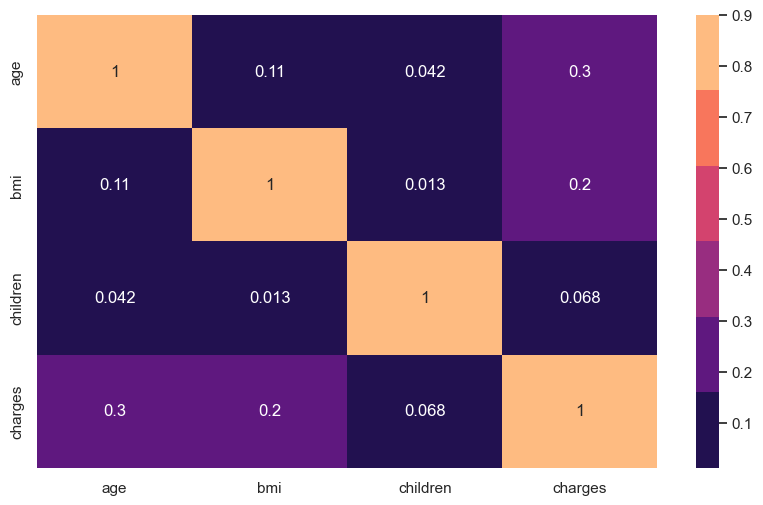

In [12]:
plt.figure(figsize = (10, 6), dpi = 100)
color = sns.color_palette("magma")
sns.heatmap(insurance_dataset.corr(), vmax=0.9, annot=True,cmap = color)

<h2>Data Preprocessing and encoding</h2>

In [13]:
new_df = insurance_dataset

#REmove duplicates
new_df.drop_duplicates(inplace = True)


#Describing new dataframe - after removing duplicates
print(new_df.shape)
new_df.head()


#Replacing string values with int
new_df["sex"].replace({"male":1, "female":0}, inplace = True)
new_df.head()

#Replacing string values with int
new_df['region'].replace({'southwest':0,'northwest':1,'northeast':2,'southeast':3}, inplace = True)
new_df['smoker'].replace({'yes':1,'no':0}, inplace = True)
new_df.head() 

#Checking for null values
new_df.isnull().sum()

#Checking for duplicates
print(new_df.duplicated().any())
print(new_df.duplicated())

#Describing data after preprocessing
print(new_df.shape)
new_df.head()

(1337, 7)
False
0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1337, dtype: bool
(1337, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [14]:
X = new_df.drop(columns='charges', axis=1)
Y = new_df['charges']
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       0
1      18    1  33.770         1       0       3
2      28    1  33.000         3       0       3
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       2
1335   18    0  36.850         0       0       3
1336   21    0  25.800         0       0       0
1337   61    0  29.070         0       1       1

[1337 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


<h2>Train Test Spliting</h2>

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(1337, 6) (1002, 6) (335, 6)


<h2>loading Model</h2>

In [17]:
# loading the Linear Regression model
regressor = LinearRegression()

In [18]:
regressor.fit(X_train, Y_train)

LinearRegression()

<h2>Predicting on test and train data</h2>

In [19]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [20]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train*100)

R squared vale :  75.798286906194


In [21]:
test_data_prediction =regressor.predict(X_test)


<h2>Modeling Evaluation</h2>

In [22]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test*100)

R squared vale :  72.2291805897916


In [23]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(Y_test,test_data_prediction))

MAE 4442.951784237604


In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, test_data_prediction)

41094263.27818962

<h2>Prediction</h2>

In [25]:
# input_data = (31,1,25.74,0,1,0)
input_data = (19,0,27.9,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[25545.32501626]
The insurance cost is USD  25545.325016255905


C:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
